**ABSTRACT**

Mediante las bases de datos de las licencias médicas tramitadas, del primer trimestre de 2019 al segundo de 2022, en la Superintendencia de Salud de Chile. La información con la que se cuenta nos permite observar cuántas solicitudes se tramitaron, cuántas de ellas se aprobaron o rechazaron, cuáles se trataron de una ampliación o reducción del tiempo autorizado; igualmente, es posible segmentar por edad, sexo, región, tipo de empleo y los días y montos que representan las licencias.

Contar con una periodización y un rango de tiempo de al menos 4 años nos podrá permitir, más adelante, buscar tendencias y aplicar métodos para predicción. Por ello, se proponen las siguientes hipótesis y preguntas:

¿Existen estacionalidades en la solicitud de licencias?
¿Cuáles son las profesiones con mayor riesgo, qué causa las licencias en cada una de ellas?
¿Cuáles son los efectos de la pandemia de COVID en este tema?

Además de estas preguntas base, se buscará la correlación entre las variables, con lo que se generarán nuevas preguntas para responder a la hipótesis de que: Las licencias que se solicitan tienen un incremento en los últimos trimestres del año; asimismo, hay tendencias por variables categóricas como el género, la edad y el campo laboral que permiten la previsión de ausencias en el trabajo e implementar medidas para reducir perdidas y baja de la productividad.

Como se puede observar en la hipótesis propuesta, el interés principal para este trabajo, es encontrar los patrones en la información histórica de las solicitudes de licencias médicas para que tanto las empresas como el sector salud puedan implementar políticas para reducir los costos que conlleva la ausencia de los trabajadores; asimismo, se podrá ver la consecuencia de la pandemia del COVID.


**CARGA DE LIBRERIAS Y BASES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_19t1 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2019t1.txt",engine = 'python',  sep = '|', header= None)
df_19t2 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2019t2.txt",engine = 'python',  sep = '|', header= None)
df_19t3 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2019t3.txt",engine = 'python',  sep = '|', header= None)
df_19t4 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2019t4.txt",engine = 'python',  sep = '|', header= None)
df_20t1 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2020t1.txt",engine = 'python',  sep = '|', header= None)
df_20t2 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2020t2.txt",engine = 'python',  sep = '|', header= None)
df_20t3 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2020t3.txt",engine = 'python',  sep = '|', header= None)
df_20t4 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2020t4.txt",engine = 'python',  sep = '|', header= None)
df_21t1 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2021t1.txt",engine = 'python',  sep = '|', header= None)
df_21t2 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2021t2.txt",engine = 'python',  sep = '|', header= None)
df_21t3 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2021t3.txt",engine = 'python',  sep = '|', header= None)
df_21t4 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2021t4.txt",engine = 'python',  sep = '|', header= None)
df_22t1 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2022t1.txt",engine = 'python',  sep = '|', header= None)
df_22t2 = pd.read_csv ("/content/drive/MyDrive/DS - CoderHouse/Licencias Médicas/Licencias_Medicas_2022t2.txt",engine = 'python',  sep = '|', header= None)


In [ ]:
#Concatenar bases#
df_licencias = pd.concat ([df_19t1,df_19t2,df_19t3,df_19t4,df_20t1,df_20t2,df_20t3,df_20t4,df_21t1,df_21t2,df_21t3,df_21t4,df_22t1,df_22t2])

**FORMATO Y MUESTRA DEL DATASET**

In [ ]:
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
#Renombrar columnas
df_licencias.rename(columns={0:"Cód.Isapre", 
                      1: "Trimestre",
                      2:"Id_trabajador", 
                      3: "Fecha de Emisión", 
                      4: "Nº de días",
                      5: "F_Inicio",
                      6: "Edad",
                      7: "Sexo",
                      8:"Act_laboral",
                      9:"Ocupación",
                      10:"Tipo_licencia",
                      11:"Caract_reposo",
                      12:"RUN",
                      13:"Tip_prof",
                      14:"TL_Contral",
                      15:"D_autorizados",
                      16:"Diagnóstico",
                      17:"Resolución",
                      18:"Periodo",
                      19:"Reposo_Aut",
                      20:"Subsidio",
                      21:"Recepción_ISAPRE",
                      22:"Resolución_ISAPRE",
                      23:"Recepción_Empl",
                      24:"Región",
                      25:"Calidad_Trab",
                      26:"Ent_Pagadora",
                      27:"D_a pagar",
                      28:"Monto_Sub_lq",
                      29:"Monto_ISAPRE",
                      30:"Inicio_Pago",
                      31:"Recuperabilidad",
                      32:"Concepción",
                      33:"Monto_pensiones",
                      34:"Otr_diagnost",
                      35:"RUN_Hijo",
                      36:"Lugar_Rep",
                      37:"Causa_RM",
                      38:"D_Previos",
                      39:"F_Afiliación",
                      40:"F_Contrato",
                      41:"Base_CSubs",
                      42:"RUT_Empleador",
                      43:"Nac_Hijo"},inplace=True)

In [ ]:
#Diccionario de campos
d_desc = {"Cód.Isapre":'Número registrado en Superintendencia para identificación de aseguradora.',"Trimestre":'Corresponde al trimestre al que pertenece el registro.',
          "Id_trabajador":'Rol Único Nacional (RUN) del trabajador, entregado por el Servicio de Registro Civil e Identificación.',"Fecha de Emisión":'Corresponde a la fecha de emisión de licencia médica.',
          "Nº de días":'Corresponde a los números de días asignados al afiliado en la licencia médica.',"F_Inicio":'Corresponde a la fecha de inicio del reposo.?',
          "Edad":'Corresponde a la edad del trabajador.',"Sexo":'Corresponde al sexo del trabajador.',
          "Act_laboral":'Actividad laboral del afiliado.',"Ocupación":'Ocupación del trabajador.',
          "Tipo_licencia":'Tipo de licencia.',"Caract_reposo":'Características del reposo.',
          "RUN":'Rol Único Nacional (RUN) del profesional, entregado por el Servicio de Registro Civil e Identificación.',"Tip_prof":'tipo de profesional.',
          "TL_Contral":'Tipo de licencia según la contraloría.',"D_autorizados":'números de días autorizados.',
         "Diagnóstico":'diagnóstico principal.',"Resolución":'tipo de resolución.',
          "Periodo":'Priodo. ',"Reposo_Aut":'Reposoautorizado.',
            "Subsidio":'Derecho a subsidio.',"Recepción_ISAPRE":'Fecha de recepción en isapre.',"Resolución_ISAPRE":'Fecha de resolución de la isapre.',"Recepción_Empl":'Fecha de recepción del empleador',
         "Región":'Región donde cumple funciones el trabajador.',"Calidad_Trab":'Calidad del trabajador',"Ent_Pagadora":'Entidad pagadora',"D_a pagar":'Número total de días con derecho a subsidio que la isapre debe pagar.',"Monto_Sub_lq":'Monto total en pesos a pagar al trabajador por concepto de subsidio.',"Monto_ISAPRE":'Monto total en pesos a pagar a la isapre que esté afiliado el trabajador por concepto de cotizaciones de salud.',"Inicio_Pago":'Fecha en que la isapre da inicio al pago previsional.',"Recuperabilidad":'Recuperabilidad',
         "Concepción":'Año de concepción',"Monto_pensiones":'Monto total en pesos a pagar a las entidades previsionales de pensiones a las que esté afiliado el trabajador.',"Otr_diagnost":'Otros diagnósticos, informado de acuerdo con la Clasificación Internacional de Enfermedades (C.I.E.),',"RUN_Hijo":'Rol Único Nacional (RUN) del hijo,',"Lugar_Rep":'Lugar de reposo',"Causa_RM":'Causa de rechazo o modificación',"D_Previos":'Días previos autorizados',"F_Afiliación":'Trimestre de afiliación',
         "F_Contrato":'Trimestre de contrato de trabajo',"Base_CSubs":'Monto en pesos, equivalente al promedio de rentas utilizado por la isapre, para determinar el monto de subsidio líquido,',"RUT_Empleador":'Rol Único Tributario',"Nac_Hijo":'Año de nacimiento del hijo' }

In [ ]:
df_licencias.head()

,Cód.Isapre,Trimestre,Id_trabajador,Fecha de Emisión,Nº de días,F_Inicio,Edad,Sexo,Act_laboral,Ocupación,Tipo_licencia,Caract_reposo,RUN,Tip_prof,TL_Contral,D_autorizados,Diagnóstico,Resolución,Periodo,Reposo_Aut,Subsidio,Recepción_ISAPRE,Resolución_ISAPRE,Recepción_Empl,Región,Calidad_Trab,Ent_Pagadora,D_a pagar,Monto_Sub_lq,Monto_ISAPRE,Inicio_Pago,Recuperabilidad,Concepción,Monto_pensiones,Otr_diagnost,RUN_Hijo,Lugar_Rep,Causa_RM,D_Previos,F_Afiliación,F_Contrato,Base_CSubs,RUT_Empleador,Nac_Hijo,44
0,67,2019t1,41757850,2019t1,20,2019t1,26-30,Femenino,Otros,Administrativo,Enf. o Acc. no del Trabajo,Reposo Total,1391282,Medico,Enf. o Acc. no del Trabajo,15,F00-F99,Reducese,Primera,Reposo Total,Verificado Requisitos Legales,2019t1,2019t1,2019t1,1,Trab. Dep. Sector Privado,Isapre,15,144220,32101,2019t1,SI,0,23994,NaN,3391531,Su Domicilio,Reposo Injustificado,0,2015t1,2018t2,288440,260638521,1800,NaN
1,67,2019t1,41757850,2019t1,25,2019t1,31-35,Femenino,Otros,Administrativo,Enf. o Acc. no del Trabajo,Reposo Total,1521323,Medico,Enf. o Acc. no del Trabajo,9,F00-F99,Reducese,Continuacion,Reposo Total,Verificado Requisitos Legales,2019t1,2019t1,2019t1,1,Trab. Dep. Sector Privado,Isapre,9,86677,19262,2019t1,SI,0,14396,NaN,3391531,Su Domicilio,Reposo Injustificado,5,2015t1,2018t2,216692,260638521,1800,NaN
2,78,2019t1,1467893,2019t1,9,2019t1,46-50,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,1708413,Medico,Enf. o Acc. no del Trabajo,5,F00-F99,Reducese,Primera,Reposo Total,Verificado Requisitos Legales,2019t1,2019t1,2019t1,13,Trab. Dep. Sector Privado,Isapre,2,22141,13415,2019t2,SI,0,9134,NaN,1529982,Su Domicilio,Otro,0,2018t1,2018t1,332115,260638884,1800,NaN
3,99,2019t1,2928844,2019t1,15,2019t1,61-65,Masculino,Comercio,"Operario,artesano,Trabaj. manual",Enf. o Acc. no del Trabajo,Reposo Total,1082995,Medico,Enf. o Acc. no del Trabajo,15,N00-N99,Autoricese,Continuacion,Reposo Total,Verificado Requisitos Legales,2019t1,2019t1,2019t1,15,Trab. Dep. Sector Privado,Isapre,15,162480,59253,2019t1,SI,0,26407,NaN,1529982,Su Domicilio,Z. Sin Clasificar,15,2002t1,2014t1,324972,260638983,1800,NaN
4,99,2019t1,2928844,2019t1,30,2019t1,61-65,Masculino,Comercio,"Operario,artesano,Trabaj. manual",Enf. o Acc. no del Trabajo,Reposo Total,3369292,Medico,Enf. o Acc. no del Trabajo,15,N00-N99,Reducese,Continuacion,Reposo Total,Verificado Requisitos Legales,2019t1,2019t1,2019t1,15,Trab. Dep. Sector Privado,Isapre,15,162480,118699,2019t2,SI,0,52814,NaN,1529982,Z. Sin Clasificar,Reposo Injustificado,30,2002t1,2014t1,324972,260638983,1800,NaN


*DIMENSIONES*

In [ ]:
df_licencias.shape

(6189606, 45)

In [ ]:
df_licencias.tail()

,Cód.Isapre,Trimestre,Id_trabajador,Fecha de Emisión,Nº de días,F_Inicio,Edad,Sexo,Act_laboral,Ocupación,Tipo_licencia,Caract_reposo,RUN,Tip_prof,TL_Contral,D_autorizados,Diagnóstico,Resolución,Periodo,Reposo_Aut,Subsidio,Recepción_ISAPRE,Resolución_ISAPRE,Recepción_Empl,Región,Calidad_Trab,Ent_Pagadora,D_a pagar,Monto_Sub_lq,Monto_ISAPRE,Inicio_Pago,Recuperabilidad,Concepción,Monto_pensiones,Otr_diagnost,RUN_Hijo,Lugar_Rep,Causa_RM,D_Previos,F_Afiliación,F_Contrato,Base_CSubs,RUT_Empleador,Nac_Hijo,44
573488,67,2022t2,2067953,2022t2,14,2022t2,46-50,Femenino,Finanzas,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,849561,Medico,Enf. o Acc. no del Trabajo,14,F00-F99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Pub. Afecto 18.834,Empleador,0,924876,0,1800t1,SI,1800,0,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2001t1,2008t1,1981877,6599107,1800,NaN
573489,99,2022t2,7024059,2022t2,3,2022t2,31-35,Masculino,Finanzas,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,77082440,Medico,Enf. o Acc. no del Trabajo,3,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Pub. Afecto 18.834,Empleador,3,204432,18379,2022t2,SI,1800,30037,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2007t4,2017t2,2044308,6599107,1800,NaN
573490,107,2022t2,3222173,2022t2,2,2022t2,41-45,Masculino,Finanzas,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,2010877623,Medico,Enf. o Acc. no del Trabajo,2,K00-K93,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Pub. Afecto 18.834,Empleador,0,0,0,1800t1,SI,1800,0,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2005t1,2010t1,0,6599107,1800,NaN
573491,99,2022t2,2819663,2022t2,7,2022t2,31-35,Masculino,Finanzas,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,2499055,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Pub. Afecto 18.834,Empleador,7,486346,43225,2022t3,SI,1800,65331,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2017t1,2084345,6599107,1800,NaN
573492,99,2022t2,1113896,2022t2,7,2022t2,31-35,Femenino,Servicios,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,261591101,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Pub. Afecto 18.834,Empleador,7,435078,42885,2022t2,SI,1800,64817,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2018t3,2022t2,1864626,6599107,1800,NaN


In [ ]:
df_licencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189606 entries, 0 to 573492
Data columns (total 45 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Cód.Isapre         int64  
 1   Trimestre          object 
 2   Id_trabajador      int64  
 3   Fecha de Emisión   object 
 4   Nº de días         int64  
 5   F_Inicio           object 
 6   Edad               object 
 7   Sexo               object 
 8   Act_laboral        object 
 9   Ocupación          object 
 10  Tipo_licencia      object 
 11  Caract_reposo      object 
 12  RUN                int64  
 13  Tip_prof           object 
 14  TL_Contral         object 
 15  D_autorizados      int64  
 16  Diagnóstico        object 
 17  Resolución         object 
 18  Periodo            object 
 19  Reposo_Aut         object 
 20  Subsidio           object 
 21  Recepción_ISAPRE   object 
 22  Resolución_ISAPRE  object 
 23  Recepción_Empl     object 
 24  Región             int64  
 25  Calidad_Trab       

In [ ]:
df_licencias.describe()

,Cód.Isapre,Id_trabajador,Nº de días,RUN,D_autorizados,Región,D_a pagar,Monto_Sub_lq,Monto_ISAPRE,Concepción,Monto_pensiones,RUN_Hijo,D_Previos,Base_CSubs,RUT_Empleador,Nac_Hijo,44
count,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,6189606.000,0.000
mean,86.900,87229553.586,14.808,100254436.103,10.199,10.813,8.303,306856.044,46563.272,767.162,49661.573,58372139.953,24.924,737243.170,63562385.023,1811.702,NaN
std,15.266,316675187.979,14.685,378098961.193,14.250,3.705,14.194,569982.367,94961.322,2024.207,83766.390,314594205.838,83.134,666530.833,276746774.689,49.342,NaN
min,62.000,2.000,0.000,200.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,-1.000,798.000,0.000,-1.000,59.000,1800.000,NaN
25%,78.000,1421220.000,4.000,1109324.000,2.000,8.000,0.000,0.000,0.000,0.000,0.000,1529982.000,0.000,0.000,2589663.000,1800.000,NaN
50%,81.000,2846322.000,11.000,2226908.000,5.000,13.000,2.000,61045.500,15696.000,0.000,19437.000,1529982.000,0.000,700221.000,6596791.000,1800.000,NaN
75%,99.000,8314809.000,21.000,3363644.000,14.000,13.000,12.000,390555.750,51758.000,0.000,60934.000,1529982.000,7.000,1267020.000,6613617.000,1800.000,NaN
max,108.000,2011105719.000,360.000,2011106061.000,168.000,16.000,330.000,22813785.000,3381375.000,9999.000,1739668.000,2011115860.000,4106.000,22813785.000,2011105982.000,2022.000,NaN


**SELECCIONAR COLUMNAS DE INTERÉS**

In [ ]:
df_select = df_licencias.loc[:,["Cód.Isapre","Trimestre","Id_trabajador","Fecha de Emisión","Nº de días","Edad","Sexo","Ocupación","Tipo_licencia","Caract_reposo","D_autorizados","Resolución","Región","Calidad_Trab","Ent_Pagadora","Monto_Sub_lq","Monto_ISAPRE","Monto_pensiones"]]

In [ ]:
df_select

,Cód.Isapre,Trimestre,Id_trabajador,Fecha de Emisión,Nº de días,Edad,Sexo,Ocupación,Tipo_licencia,Caract_reposo,D_autorizados,Resolución,Región,Calidad_Trab,Ent_Pagadora,Monto_Sub_lq,Monto_ISAPRE,Monto_pensiones
0,67,2019t1,41757850,2019t1,20,26-30,Femenino,Administrativo,Enf. o Acc. no del Trabajo,Reposo Total,15,Reducese,1,Trab. Dep. Sector Privado,Isapre,144220,32101,23994
1,67,2019t1,41757850,2019t1,25,31-35,Femenino,Administrativo,Enf. o Acc. no del Trabajo,Reposo Total,9,Reducese,1,Trab. Dep. Sector Privado,Isapre,86677,19262,14396
2,78,2019t1,1467893,2019t1,9,46-50,Masculino,Otros,Enf. o Acc. no del Trabajo,Reposo Total,5,Reducese,13,Trab. Dep. Sector Privado,Isapre,22141,13415,9134
3,99,2019t1,2928844,2019t1,15,61-65,Masculino,"Operario,artesano,Trabaj. manual",Enf. o Acc. no del Trabajo,Reposo Total,15,Autoricese,15,Trab. Dep. Sector Privado,Isapre,162480,59253,26407
4,99,2019t1,2928844,2019t1,30,61-65,Masculino,"Operario,artesano,Trabaj. manual",Enf. o Acc. no del Trabajo,Reposo Total,15,Reducese,15,Trab. Dep. Sector Privado,Isapre,162480,118699,52814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573488,67,2022t2,2067953,2022t2,14,46-50,Femenino,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,14,Autoricese,13,Trab. Pub. Afecto 18.834,Empleador,924876,0,0
573489,99,2022t2,7024059,2022t2,3,31-35,Masculino,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,3,Autoricese,13,Trab. Pub. Afecto 18.834,Empleador,204432,18379,30037
573490,107,2022t2,3222173,2022t2,2,41-45,Masculino,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,2,Autoricese,13,Trab. Pub. Afecto 18.834,Empleador,0,0,0
573491,99,2022t2,2819663,2022t2,7,31-35,Masculino,Otro Profesional,Enf. o Acc. no del Trabajo,Reposo Total,7,Autoricese,13,Trab. Pub. Afecto 18.834,Empleador,486346,43225,65331


In [ ]:
df_select["Tipo_licencia"].unique()

array(['Enf. o Acc. no del Trabajo', 'Licencia Maternal',
       'Accidente del Trabajo', 'Enf. Hijo Menor',
       'Prorroga Medicina Preventiva', 'Patologia del Embarazo',
       'Enfermedad Profesional'], dtype=object)

**ANÁLISIS BIVARIADO Y MULTIVARIADO**

*Categorizar por resolución: autorizadas, rechazadas, reducciones y ampliaciones*

In [ ]:
#Solicitudes totales por trimestre
df_solicitudes = df_select.groupby("Trimestre")["Resolución"].count()
df_solicitudes

Trimestre
2019t1    351287
2019t2    494082
2019t3    475316
2019t4    434910
2020t1    396547
2020t2    320946
2020t3    358910
2020t4    380299
2021t1    411776
2021t2    475523
2021t3    475600
2021t4    493814
2022t1    547103
2022t2    573493
Name: Resolución, dtype: int64

In [ ]:
#Resolución de solicitud por trimestre
df_autorizadas = df_select[df_select.Resolución.isin(["Autoricese"])]
df_rechazadas = df_select[df_select.Resolución.isin(["Rechacese"])]
df_ampliaciones = df_select[df_select.Resolución.isin(["Ampliese"])]
df_reducciones = df_select[df_select.Resolución.isin(["Reducese"])]
df_sinclasificar = df_select[df_select.Resolución.isin(["Z. Sin Clasificar"])]

In [ ]:
#Solicitudes autorizadas por trimestre
df_autrim = df_autorizadas.groupby("Trimestre")["Resolución"].count()
df_autrim

Trimestre
2019t1    256377
2019t2    382115
2019t3    362276
2019t4    324331
2020t1    281798
2020t2    211947
2020t3    250224
2020t4    276240
2021t1    303965
2021t2    339544
2021t3    331684
2021t4    326893
2022t1    364125
2022t2    370274
Name: Resolución, dtype: int64

In [ ]:
#Solicitudes hechas por género
df_solicitudgender = df_select.groupby("Sexo")["Resolución"].count()
df_solicitudgender

Sexo
Femenino      3301756
Masculino     2887712
Z. Sin Cla        138
Name: Resolución, dtype: int64

In [ ]:
#solicitudes por rango de edad
df_solicitudedad = df_select.groupby("Edad")["Resolución"].count()
df_solicitudedad

Edad
0-5            24
11-15           9
16-20       10947
21-25      225070
26-30      987542
31-35     1355089
36-40     1092979
41-45      731577
46-50      565239
51-55      453861
56-60      392813
6-10            8
61-65      258998
66-70       84355
71-75       23203
76-80        6030
81-85        1452
86-90         353
91-95          56
96-100          1
Name: Resolución, dtype: int64

In [ ]:
#Causa de la solicitud
df_solicitudcausa = df_select.groupby("Tipo_licencia")["Resolución"].count()
df_solicitudcausa

Tipo_licencia
Accidente del Trabajo              1630
Enf. Hijo Menor                  204801
Enf. o Acc. no del Trabajo      5602451
Enfermedad Profesional            22044
Licencia Maternal                230696
Patologia del Embarazo           125472
Prorroga Medicina Preventiva       2512
Name: Resolución, dtype: int64

In [ ]:
#Licencias por ocupación
df_solicitudocup = df_select.groupby("Ocupación")["Resolución"].count()
df_solicitudocup

Ocupación
Administrativo                      1362413
Ejecutivo                            125094
Operario,artesano,Trabaj. manual     611782
Otro Profesional                    1780473
Otros                               1164819
Profesor                             473769
Tecnico                              290794
Trabajador Casa Particular             4364
Vendedor                             332338
Z. Sin Clasificar                     43760
Name: Resolución, dtype: int64

In [ ]:
licencias_trimgender = df_select.groupby(["Trimestre", "Sexo"])["Resolución"].count()
licencias_trimgender

Trimestre  Sexo      
2019t1     Femenino      193850
           Masculino     157419
           Z. Sin Cla        18
2019t2     Femenino      283617
           Masculino     210458
           Z. Sin Cla         7
2019t3     Femenino      272932
           Masculino     202377
           Z. Sin Cla         7
2019t4     Femenino      250120
           Masculino     184786
           Z. Sin Cla         4
2020t1     Femenino      214183
           Masculino     182358
           Z. Sin Cla         6
2020t2     Femenino      153285
           Masculino     167649
           Z. Sin Cla        12
2020t3     Femenino      182131
           Masculino     176761
           Z. Sin Cla        18
2020t4     Femenino      198833
           Masculino     181450
           Z. Sin Cla        16
2021t1     Femenino      200215
           Masculino     211550
           Z. Sin Cla        11
2021t2     Femenino      234583
           Masculino     240923
           Z. Sin Cla        17
2021t3     Femenin

In [ ]:
df_solicitudespd = pd.DataFrame (df_solicitudes)
graph_solicitudespd = df_solicitudespd.T

In [ ]:
df_soltrimgender = pd.DataFrame (licencias_trimgender)
df_soltrimgender

Resolución
Trimestre Sexo                  
2019t1    Femenino        193850
          Masculino       157419
          Z. Sin Cla          18
2019t2    Femenino        283617
          Masculino       210458
          Z. Sin Cla           7
2019t3    Femenino        272932
          Masculino       202377
          Z. Sin Cla           7
2019t4    Femenino        250120
          Masculino       184786
          Z. Sin Cla           4
2020t1    Femenino        214183
          Masculino       182358
          Z. Sin Cla           6
2020t2    Femenino        153285
          Masculino       167649
          Z. Sin Cla          12
2020t3    Femenino        182131
          Masculino       176761
          Z. Sin Cla          18
2020t4    Femenino        198833
          Masculino       181450
          Z. Sin Cla          16
2021t1    Femenino        200215
          Masculino       211550
          Z. Sin Cla          11
2021t2    Femenino        234583
          Masculino       240923
          Z. Sin Cla          17
2021t3    Femenino        246998
          Masculino       228585
          Z. Sin Cla          17
2021t4    Femenino        266258
          Masculino       227552
          Z. Sin Cla           4
2022t1    Femenino        276730
          Masculino       270372
          Z. Sin Cla           1
2022t2    Femenino        328021
          Masculino       245472

**VISUALIZACIONES**

Text(0.5, 0, 'Trimestre')

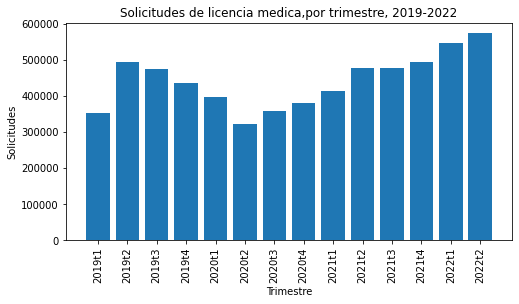

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar (graph_solicitudespd.columns,df_solicitudes)
plt.xticks(rotation=90)
ax.set_title("Solicitudes de licencia medica,por trimestre, 2019-2022")
ax.set_ylabel("Solicitudes")
ax.set_xlabel("Trimestre")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

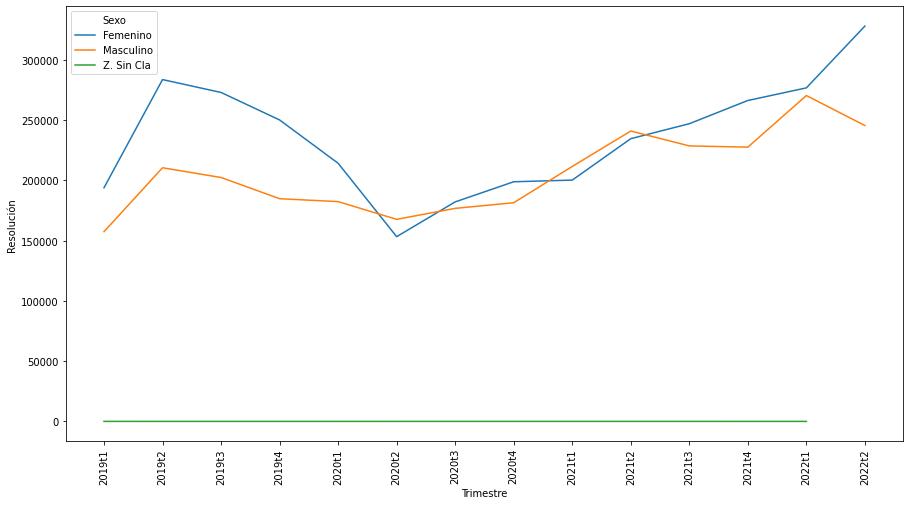

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot (data = df_soltrimgender, x = ("Trimestre"), y = "Resolución", hue = "Sexo")
plt.xticks(rotation=90)

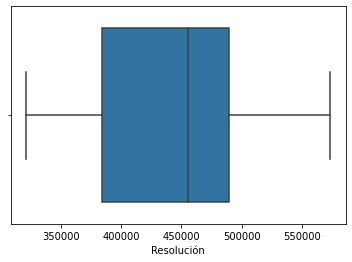

In [ ]:
df_solicitudesdf =pd.DataFrame (df_solicitudes)
ax = sns.boxplot(x=df_solicitudesdf["Resolución"])

**EVALUACIÓN Y PROCESO DE VALORES NULOS Y ATIPICOS**

In [ ]:
df_selectpd = pd.DataFrame(df_select)
df_selectpd.isnull()

,Cód.Isapre,Trimestre,Id_trabajador,Fecha de Emisión,Nº de días,Edad,Sexo,Ocupación,Tipo_licencia,Caract_reposo,D_autorizados,Resolución,Región,Calidad_Trab,Ent_Pagadora,Monto_Sub_lq,Monto_ISAPRE,Monto_pensiones
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573488,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
573489,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
573490,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
573491,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# La base con las columnas de interés no tiene valores nulos
df_selectpd.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Cód.Isapre  Trimestre  Id_trabajador  Fecha de Emisión  Nº de días  \
0            False      False          False             False       False   
1            False      False          False             False       False   
2            False      False          False             False       False   
3            False      False          False             False       False   
4            False      False          False             False       False   
...            ...        ...            ...               ...         ...   
573488       False      False          False             False       False   
573489       False      False          False             False       False   
573490       False      False          False             False       False   
573491       False      False          False             False       False   
573492       False      False          False             False       False   

 

In [ ]:
#Selección de variables numericas
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189606 entries, 0 to 573492
Data columns (total 18 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Cód.Isapre        int64 
 1   Trimestre         object
 2   Id_trabajador     int64 
 3   Fecha de Emisión  object
 4   Nº de días        int64 
 5   Edad              object
 6   Sexo              object
 7   Ocupación         object
 8   Tipo_licencia     object
 9   Caract_reposo     object
 10  D_autorizados     int64 
 11  Resolución        object
 12  Región            int64 
 13  Calidad_Trab      object
 14  Ent_Pagadora      object
 15  Monto_Sub_lq      int64 
 16  Monto_ISAPRE      int64 
 17  Monto_pensiones   int64 
dtypes: int64(8), object(10)
memory usage: 897.2+ MB


In [ ]:
#Armado de un DF de varibles númericas y una objetivo
df_num = df_select.select_dtypes('number')
df_num['Tipo_licencia'] = df_select['Tipo_licencia']
df_num.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cód.Isapre,Id_trabajador,Nº de días,D_autorizados,Región,Monto_Sub_lq,Monto_ISAPRE,Monto_pensiones,Tipo_licencia
0,67,41757850,20,15,1,144220,32101,23994,Enf. o Acc. no del Trabajo
1,67,41757850,25,9,1,86677,19262,14396,Enf. o Acc. no del Trabajo
2,78,1467893,9,5,13,22141,13415,9134,Enf. o Acc. no del Trabajo
3,99,2928844,15,15,15,162480,59253,26407,Enf. o Acc. no del Trabajo
4,99,2928844,30,15,15,162480,118699,52814,Enf. o Acc. no del Trabajo


In [ ]:
len(df_num)

6189606

In [ ]:
#Eliminamos valores duplicados
df_num.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
len(df_num)

5508952

In [ ]:
df_num.Monto_Sub_lq.nunique()

1081563

Nº de días Corresponde a los números de días asignados al afiliado en la licencia médica.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


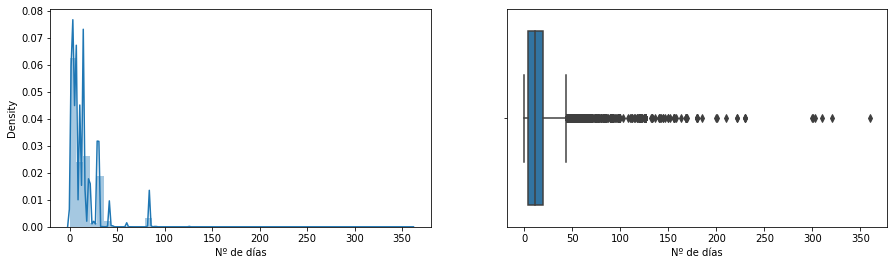

D_autorizados números de días autorizados.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


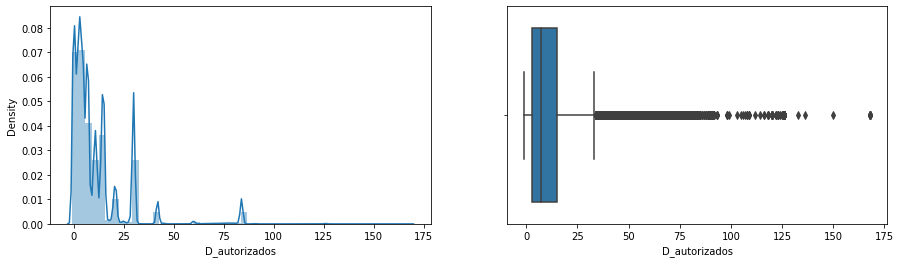

Monto_Sub_lq Monto total en pesos a pagar al trabajador por concepto de subsidio.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


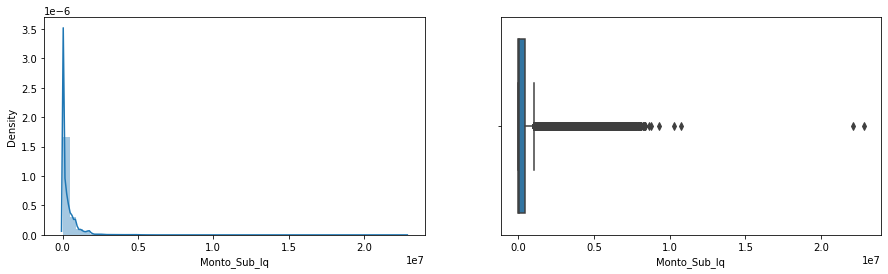

In [ ]:
#Evaluar outliers
for col in ['Nº de días', 'D_autorizados', 'Monto_Sub_lq']:
    print(col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

In [ ]:
#Análisis de los outliers en la variable objetivo
for col in ['Nº de días', 'D_autorizados', 'Monto_Sub_lq']:
    print(col, d_desc[col])
    sns.violinplot(x='Tipo_licencia', y=col, data=df_num)
    plt.xticks(rotation=90)
    plt.figure(figsize = (15,8))
    plt.show()

In [ ]:
#Seleccionamos la variable N° de días por mostrar una mayor densidad en la relación con la variable objetivo
Q1 = df_num['Nº de días'].quantile(0.25)
Q3 = df_num['Nº de días'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


In [ ]:
df_num['días'] = df_num['Nº de días']
df_num.loc[df_num['días']>tope, 'días'] = tope

*Convertimos la variable objetivo en númerica para el modelo*

In [ ]:
df_num.Tipo_licencia.unique()

In [ ]:
df_num['Tipo_licencia'] = df_num.Tipo_licencia.map({'Enf. o Acc. no del Trabajo':0, 'Licencia Maternal':1,'Accidente del Trabajo':2, 'Enf. Hijo Menor':3, 'Prorroga Medicina Preventiva':4, 'Patologia del Embarazo':5, 'Enfermedad Profesional':6})

In [ ]:
df_num.Tipo_licencia.unique()

**BASE DEL MODELO**

In [ ]:
df_num.head()

In [ ]:
#Para el modelo, generamos varias combinaciones de columnas para evaluar
##Columnas sin procesar outliers
Col_1 = df_num.columns.tolist()[:-1]
##Columnas con proceso de outliers
Col_2 = df_num.drop("Nº de días", axis = 1).columns.tolist()


**MODELO DE ÁRBOL**

In [ ]:
#Split del DataSet
from sklearn.model_selection import train_test_split

In [ ]:
X = df_num[Col_1].drop('Tipo_licencia', axis=1)
y = df_num['Tipo_licencia']

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

In [ ]:
# porcentaje de clase True en train
100*y_train.sum()/len(y_train)

*Modelos*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

In [ ]:
#Training
tree_model.fit(X_train, y_train)

In [ ]:
tree_model.get_params()

*Predicción*

In [ ]:
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

In [ ]:
y_pred.shape

In [ ]:
y_pred[:10]

In [ ]:
#Comparación de la predicción con el valor real
y_test[:10].values

*Evaluación*

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
recall = recall_score(y_train, y_pred_train,
                      average = "micro")   
precision = precision_score(y_train, y_pred_train,
                            average = "micro")
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train,
              average = "micro")

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

*Evaluación del modelo entrenado con el conjunto de prueba*

In [ ]:
recall = recall_score(y_test, y_pred,
                      average = "micro")
precision = precision_score(y_test, y_pred,
                            average = "micro")
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,
              average = "micro")

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
y_test.value_counts()

In [ ]:
print(classification_report(y_test, y_pred))

*Probabilidades*

In [ ]:
probabilidad = tree_model.predict_proba(X_test)
probabilidad

In [ ]:
tree_model.feature_importances_

In [ ]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia